# CPE721 - Redes Neurais Feedforward

***Data Set***: 
* ***Student Performance***
* Fonte: https://archive.ics.uci.edu/ml/datasets/Student+Performance

**Referência**:
* P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. [Link](http://www3.dsi.uminho.pt/pcortez/student.pdf)

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importação do Data Set

In [77]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')

In [48]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [49]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### 1.1 Descrição

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) \
2 sex - student's sex (binary: "F" - female or "M" - male) \
3 age - student's age (numeric: from 15 to 22) \
4 address - student's home address type (binary: "U" - urban or "R" - rural) \
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) \
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart) \
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) \
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) \
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") \
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") \
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other") \
12 guardian - student's guardian (nominal: "mother", "father" or "other") \
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) \
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) \
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) \
16 schoolsup - extra educational support (binary: yes or no) \
17 famsup - family educational support (binary: yes or no) \
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) \
19 activities - extra-curricular activities (binary: yes or no) \
20 nursery - attended nursery school (binary: yes or no) \
21 higher - wants to take higher education (binary: yes or no) \
22 internet - Internet access at home (binary: yes or no) \
23 romantic - with a romantic relationship (binary: yes or no) \
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) \
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) \
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) \
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) \
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) \
29 health - current health status (numeric: from 1 - very bad to 5 - very good) \
30 absences - number of school absences (numeric: from 0 to 93)\
31 G1 - first period grade (numeric: from 0 to 20)\
32 G2 - second period grade (numeric: from 0 to 20)\
32 G3 - final grade (numeric: from 0 to 20, output target)

**Tipos de *features***:
* 13 variáveis binárias;
* 4 variáveis categóricas nominais (sem relação numérica);
* 13 variáveis numéricas (inteiras).

In [50]:
var_bin = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
var_nom = ['Mjob', 'Fjob', 'reason', 'guardian']
var_num = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

**Target**

Iremos utilizar a coluna G3 (nota final) como Target, tanto para classificação como para regressão

## 2. Pré-Processamento

### 2.1 Análise de consistência do *Dataset*

#### Verificação de dados faltantes:

In [51]:
df_por.isnull().values.any() or df_mat.isnull().values.any()

False

#### Verificação dos valores numéricos:

In [52]:
df_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [53]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Análise de Outliers

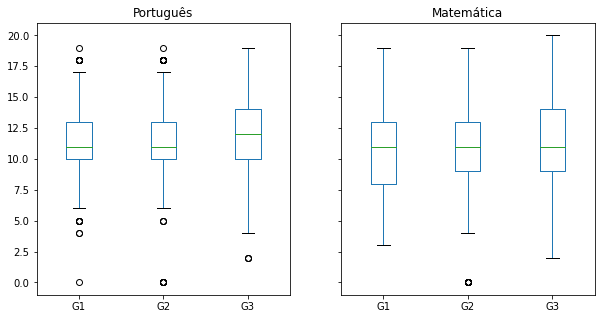

In [89]:
fig, axs = plt.subplots(1,2, figsize=(10,5), sharey=True)
axs[0].set_title('Português')
df_por.boxplot(['G1', 'G2', 'G3'], grid=False,ax=axs[0])
axs[1].set_title('Matemática')
df_mat.boxplot(['G1', 'G2', 'G3'], grid=False, ax=axs[1])
plt.show()

Analisando os Outliers, verificamos a presença de notas 0 ou 1 para a G3 inconsistentes com as notas G1 e G2:

In [57]:
df_por[(df_por['G3']<=1) & (df_por['G1']!=0) & (df_por['G2']!=0)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
163,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,11,9,0
172,GP,M,16,U,GT3,T,3,3,other,services,...,4,5,5,4,4,5,0,10,10,1
519,MS,M,16,R,GT3,T,2,1,other,services,...,5,2,1,1,1,2,0,8,7,0
583,MS,F,18,R,GT3,T,2,2,other,other,...,5,5,5,1,1,3,0,8,6,0
586,MS,F,17,U,GT3,T,4,2,teacher,services,...,5,5,5,1,3,5,0,8,8,0


In [58]:
print("Número de registros inconsistentes: ",len(df_mat[(df_mat['G3']<=1) & (df_mat['G1']!=0) & (df_mat['G2']!=0)]))

Número de registros inconsistentes:  25


In [59]:
df_mat[(df_mat['G3']<=1) & (df_mat['G1']!=0) & (df_mat['G2']!=0)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0
148,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,0,7,6,0
150,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,6,5,0


Para estes casos, resolvemos considerar a nota G3 igual à média (arrendonda) de G1 e G2

In [80]:
df_por.loc[(df_por['G3'] <=1), 'G3'] = df_por[df_por['G3']<=1].apply(lambda x: np.round((x['G1']+x['G2'])/2,0),axis=1).astype(int)

In [81]:
df_mat.loc[(df_mat['G3'] <=1), 'G3'] = df_mat[df_mat['G3']<=1].apply(lambda x: np.round((x['G1']+x['G2'])/2,0),axis=1).astype(int)

Mesmo após correção, constatamos que ainda há outliers na série G3 de Português:

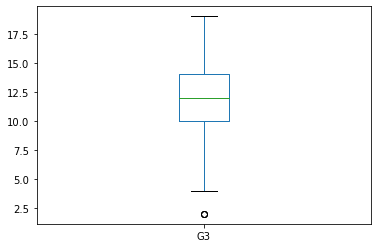

In [86]:
df_por.boxplot('G3', grid=False)
plt.show()

In [83]:
df_por[(df_por['G3']<=3)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
567,MS,M,18,R,GT3,T,3,2,services,other,...,2,3,1,2,2,5,0,4,0,2
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,5,3,1,1,1,5,0,5,0,2
605,MS,F,19,U,GT3,T,1,1,at_home,services,...,5,5,5,2,3,2,0,5,0,2


Como aparentemente não há problmea com esas notas, não excluímos estes dados.

### 2.2 Possibilidade de união dos *datasets*

Vamos comparar a CDF empírica das notas para verificar se podemos considerar as mesmas provenientes da mesma distribuição:

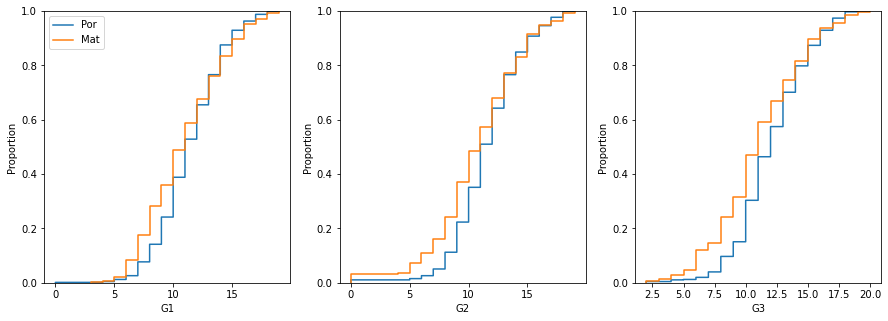

In [141]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.ecdfplot(df_por['G1'],ax=ax[0], label='Por')
sns.ecdfplot(df_mat['G1'],ax=ax[0], label='Mat')
sns.ecdfplot(df_por['G2'],ax=ax[1], label='Por')
sns.ecdfplot(df_mat['G2'],ax=ax[1], label='Mat')
sns.ecdfplot(df_por['G3'],ax=ax[2], label='Por')
sns.ecdfplot(df_mat['G3'],ax=ax[2], label='Mat')
ax[0].legend()
plt.show()

Verificando através de um teste de U de Mann-Whitney:

In [146]:
from scipy.stats import mannwhitneyu
from termcolor import colored
alpha=0.05
U,p = mannwhitneyu(df_por['G3'], df_mat['G3'],use_continuity=False)
print('Estatística:', U)
print('p-valor:', p)
if p<alpha:
    print(colored('Rejeitamos H0','red'))
else:
    print(colored('Não rejeitamos H0','green'))

Estatística: 114737.0
p-valor: 0.00212626159147896
Rejeitamos H0


### 2.2 Análise e seleção de *features*

In [91]:
df = df_por.copy()

### 2.2 Codificação das Variáveis binárias

* Substituição das 13 variáveis binárias em texto por {-1, +1}

In [92]:
df['school'].replace({'GP': -1, 'MS': 1}, inplace=True)
df['sex'].replace({'F': -1, 'M': 1}, inplace=True)
df['address'].replace({'R': -1, 'U': 1}, inplace=True)
df['famsize'].replace({'LE3': -1, 'GT3': 1}, inplace=True)
df['Pstatus'].replace({'A': -1, 'T': 1}, inplace=True)
df['schoolsup'].replace({'no': -1, 'yes': 1}, inplace=True)
df['famsup'].replace({'no': -1, 'yes': 1}, inplace=True)
df['paid'].replace({'no': -1, 'yes': 1}, inplace=True)
df['activities'].replace({'no': -1, 'yes': 1}, inplace=True)
df['nursery'].replace({'no': -1, 'yes': 1}, inplace=True)
df['higher'].replace({'no': -1, 'yes': 1}, inplace=True)
df['internet'].replace({'no': -1, 'yes': 1}, inplace=True)
df['romantic'].replace({'no': -1, 'yes': 1}, inplace=True)

C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


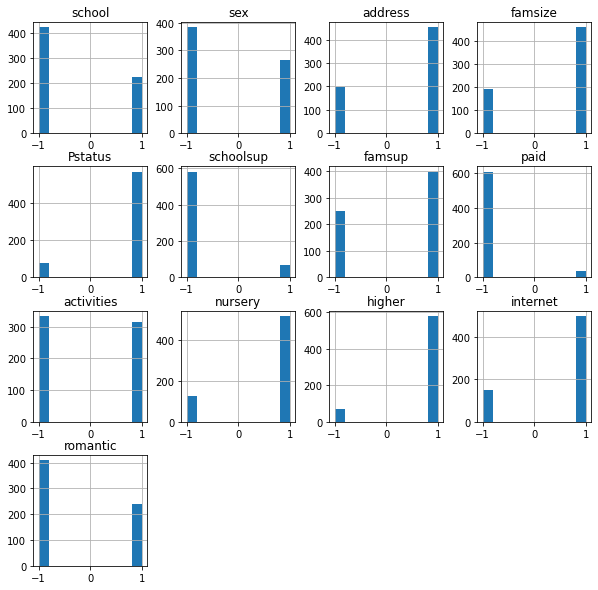

<Figure size 432x288 with 0 Axes>

In [93]:
fig, ax1 = plt.subplots(figsize=(10,10))
df.hist(var_bin,ax=ax1)
plt.show()
plt.tight_layout()

Algumas constatações:
* Poucos alunos moram sozinhos (Pstatus)
* Poucos com educação complementar (schoolsup)
* Poucos que pagam por cursos suplementares (paid
* Poucos nãoquerem cursar educação superior

Na hora de amostrar os datasets, tentar amostrar de forma igualitária

### 2.2 Variáveis categóricas nominais

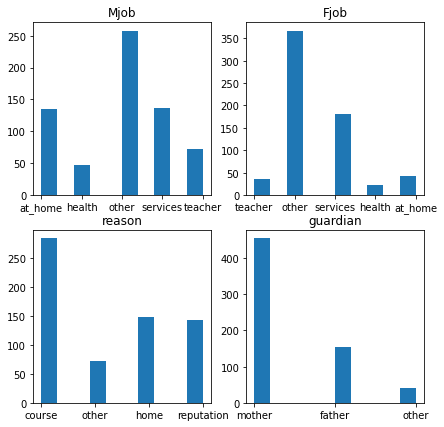

In [10]:
fig, axs = plt.subplots(2,2, figsize=(7,7))
axs[0,0].hist(df['Mjob'])
axs[0,0].set_title('Mjob')
axs[0,1].hist(df['Fjob'])
axs[0,1].set_title('Fjob')
axs[1,0].hist(df['reason'])
axs[1,0].set_title('reason')
axs[1,1].hist(df['guardian'])
axs[1,1].set_title('guardian')
plt.show()

* Conversão das variáveis nominais em notação binária maximamente esparsa

In [11]:
df['Mjob']=pd.get_dummies(df['Mjob']).replace({0:-1}).values.tolist()
df['Fjob']=pd.get_dummies(df['Fjob']).replace({0:-1}).values.tolist()
df['reason']=pd.get_dummies(df['reason']).replace({0:-1}).values.tolist()
df['guardian']=pd.get_dummies(df['guardian']).replace({0:-1}).values.tolist()

#Mjob = df_por[['Mjob']]
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#enc.fit_transform(Mjob).toarray()

### 2.3 Variáveis numéricas

C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


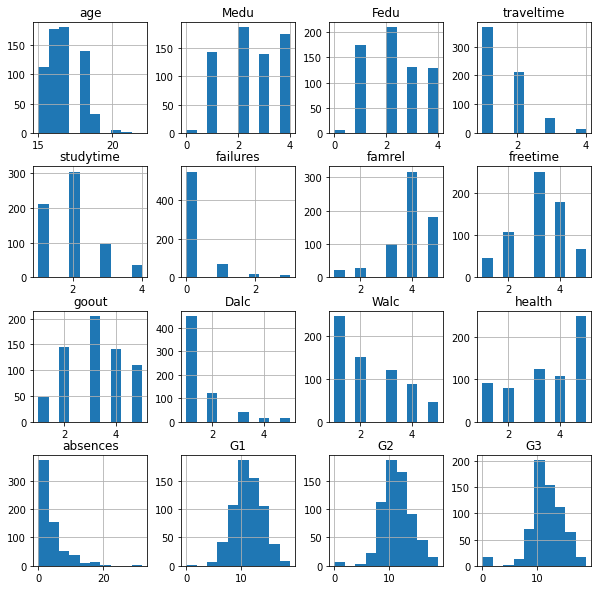

<Figure size 432x288 with 0 Axes>

In [12]:
fig, ax1 = plt.subplots(figsize=(10,10))
df.hist(var_num,ax=ax1)
plt.show()
plt.tight_layout()

### 2.3 Normalização (*Scaling*)

In [13]:
from sklearn.preprocessing import StandardScaler
scalerG3 = StandardScaler().fit(df[['G3']])
Y = scalerG3.transform(df[['G3']])

In [ ]:
df

In [15]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# cat_pipeline = Pipeline([
#     ('one_hot', OneHotEncoder(sparse=False)),
# ])

from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, var_num[:-3]),
])

df2 = pd.DataFrame(
     data = full_pipeline.fit_transform(df_por),
     columns = var_num[:-3])

In [16]:
oh_Mjob=pd.get_dummies(df_por['Mjob']).replace({0:-1}).values
oh_Fjob=pd.get_dummies(df_por['Fjob']).replace({0:-1}).values
oh_reason=pd.get_dummies(df_por['reason']).replace({0:-1}).values
oh_guardian=pd.get_dummies(df_por['guardian']).replace({0:-1}).values

X = np.hstack((df2.values, df[var_bin].values, oh_Mjob, oh_Fjob, oh_reason, oh_guardian))

In [30]:
X.shape
np.savetxt('X.txt',X,delimiter=',')
np.savetxt('y.txt',y)

#### 2.5.1 Distribuição das notas

##### Histograma e *Probability Plot*:

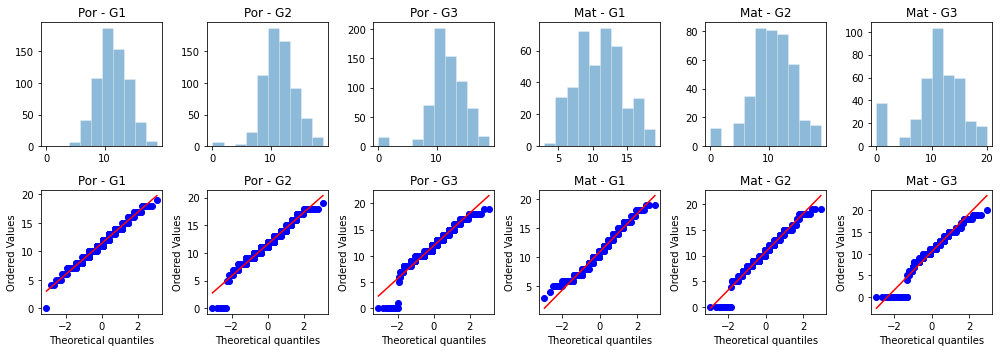

In [55]:
fig, axs = plt.subplots(2, 6, figsize=(14,5))
axs[0,0].set_title('Por - G1')
axs[0,0].hist(df_por['G1'], alpha=0.5, edgecolor='white',linewidth=0.5)
axs[0,1].set_title('Por - G2')
axs[0,1].hist(df_por['G2'], alpha=0.5, edgecolor='white',linewidth=0.5)
axs[0,2].set_title('Por - G3')
axs[0,2].hist(df_por['G3'], alpha=0.5, edgecolor='white',linewidth=0.5)

axs[0,3].set_title('Mat - G1')
axs[0,3].hist(df_mat['G1'], alpha=0.5, edgecolor='white',linewidth=0.5)
axs[0,4].set_title('Mat - G2')
axs[0,4].hist(df_mat['G2'], alpha=0.5, edgecolor='white',linewidth=0.5)
axs[0,5].set_title('Mat - G3')
axs[0,5].hist(df_mat['G3'], alpha=0.5, edgecolor='white',linewidth=0.5)


_ = probplot(df_por['G1'], plot=axs[1,0])
_ = probplot(df_por['G2'], plot=axs[1,1])
_ = probplot(df_por['G3'], plot=axs[1,2])
_ = probplot(df_mat['G1'], plot=axs[1,3])
_ = probplot(df_mat['G2'], plot=axs[1,4])
_ = probplot(df_mat['G3'], plot=axs[1,5])
axs[1,0].set_title('Por - G1')
axs[1,1].set_title('Por - G2')
axs[1,2].set_title('Por - G3')
axs[1,3].set_title('Mat - G1')
axs[1,4].set_title('Mat - G2')
axs[1,5].set_title('Mat - G3')

plt.tight_layout()

##### Teste de Kolmogorov-Smirnov

Verificamos que a duistribuição difere bem da normal para os quantis extremos.
Confirmando com um teste de normalidade (Kolmogorov-Smirnov):

In [77]:
from scipy.stats import kstest, norm
from termcolor import colored
alpha=0.05
s,p = kstest(df_por['G1'], norm(df_por['G1'].mean(), df_por['G1'].std()).cdf)
print('Estatística:', s)
print('p-valor:', p)
if p<alpha:
    print(colored('Rejeitamos H0','red'))
else:
    print(colored('Não rejeitamos H0','green'))

Estatística: 0.08629548739924209
p-valor: 0.00011817595837682297
Rejeitamos H0


**Conclusão**: Não temos confiança para supor que as notas são normalmente distribuídas

##### Português x Matemática

#### 2.5.1 Variáveis Numéricas x {Numéricas, Ordinais} & Ordinais x Ordinais

Para variáveis ordinária e numéricas, podemos utilizar a **correlação de Kendall** para os 3 casos:
* Numérica x numérica (relação linear ou não-linear)
* Numérica x ordinária
* Ordinária x ordinária

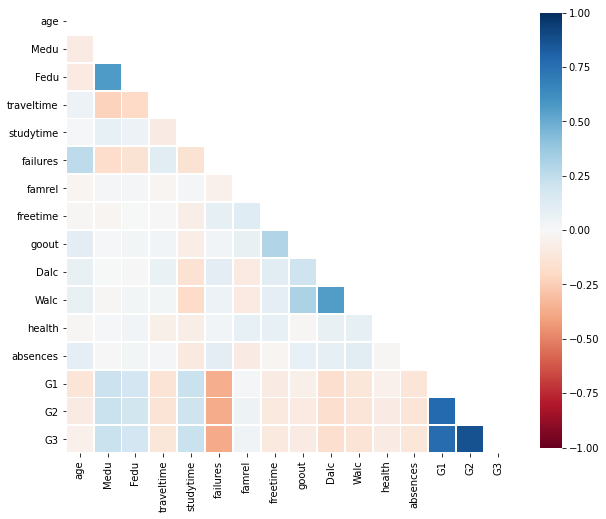

In [466]:
plt.figure(figsize=(10,10))
import seaborn as sns
Cor = df[var_num].corr(method='kendall')
mask = np.triu(np.ones_like(Cor, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(Cor, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, square=True, cbar_kws={"shrink": 0.8}) 
plt.show()

**O que menos influencia nas notas (candidatos a exclusão) ($r < 0.05$)**:
* **Idade** 
* Morar ou não junto com a família ('Pstatus')
* Tamanho da família ('famsize')
* Suporte da família ('famsup')
* Atividades extra pagas ('paid')
* Ter frequentado creche ('nursery')
* **Qualidade dos relacionamentos familiares ('famrel')**
* Saúde

**Forte correlação (candidatas a exclusão) ($r > 0.5$)**: 
* Notas ('G1', 'G2', 'G3')
* Educação da mãe e do pai ('Medu', 'Fedu')
* Consumo de álcool durante a semana e no final de semana ('Dalc', 'Walc')

**Correlação média ($ 0.30 \leq  r < 0.49$)**: 
* Escola e tipo de endereço (urbano ou rural) ('school', 'adress')
* Endereço e distância da escola ('adress', 'traveltime')
* Ambição de cursar ensino superior x falhas passadas? (neg)
* Ambição de cursar ensino superior x notas
* **Tempo livre x saídas**
* **Saída x álcool no final de semana**
* **Notas x falhas passadas?**

**O que mais influencia nas notas ($r \geq 0.25$)**:
1. **Falhas passadas**
2. Ambição de cursar ensino superior
3. Educação da mãe
3. Tempo de estudo
4. Escola

Correlação forte:

In [467]:
[{k:v.dropna().sort_values(ascending=False).to_dict()} for k,v in Cor[(abs(Cor)>0.5) & (Cor!=1)].dropna(how='all').iterrows()]

[{'Medu': {'Fedu': 0.5699542769295948}},
 {'Fedu': {'Medu': 0.5699542769295948}},
 {'Dalc': {'Walc': 0.5554070031251653}},
 {'Walc': {'Dalc': 0.5554070031251653}},
 {'G1': {'G2': 0.7806392259664587, 'G3': 0.7661978205471978}},
 {'G2': {'G3': 0.8695948161419733, 'G1': 0.7806392259664587}},
 {'G3': {'G2': 0.8695948161419733, 'G1': 0.7661978205471978}}]

Correlão média:

In [468]:
[{k:v.dropna().sort_values(ascending=False).to_dict()} for k,v in Cor[(abs(Cor)>=0.30) & (abs(Cor)<0.49) & (Cor!=1)].dropna(how='all').iterrows()]

[{'failures': {'G1': -0.3657803059275828,
   'G2': -0.3679692864456738,
   'G3': -0.3788834527894042}},
 {'freetime': {'goout': 0.30390356102921307}},
 {'goout': {'Walc': 0.3149072634489067, 'freetime': 0.30390356102921307}},
 {'Walc': {'goout': 0.3149072634489067}},
 {'G1': {'failures': -0.3657803059275828}},
 {'G2': {'failures': -0.3679692864456738}},
 {'G3': {'failures': -0.3788834527894042}}]

Correção fraca com notas:

In [473]:
[{k:v.dropna().sort_values(ascending=False).to_dict()} for k,v in Cor[(abs(Cor)<0.05) & (Cor!=1)][['G3']].dropna(how='all').iterrows()]

[{'age': {'G3': -0.04845104491041805}}, {'famrel': {'G3': 0.0391197599389804}}]

Correção forte com notas:

In [474]:
[{k:v.dropna().sort_values(ascending=False).to_dict()} for k,v in Cor[(abs(Cor)>=0.25) & (Cor!=1)][['G3']].dropna(how='all').iterrows()]

[{'failures': {'G3': -0.3788834527894042}},
 {'G1': {'G3': 0.7661978205471978}},
 {'G2': {'G3': 0.8695948161419733}}]

#### 2.5.2 Variáveis Nominais {Nominais, Ordinárias}, Dicotômica x Ordinal

#### 2.5.2 Variáveis Dicotômicas x Dicotômica

## 3. Baseline: SVM

In [18]:
y = (df.G3 > 10).astype(int).replace({0:-1}).values

In [19]:
from sklearn import svm
from sklearn.model_selection import  KFold, GridSearchCV

In [20]:

# C_range = np.arange(1,10.1,0.1)
# gamma_range = np.logspace(-5,1,7)
# param_grid = [dict(C=C_range, gamma=gamma_range)]

# # Parameters
# K =  10      # k-fold parameter

# # Cross-validation
# cv = KFold(n_splits=K)
# grid = GridSearchCV(svm.SVC(kernel='rbf',cache_size=1000), param_grid=param_grid, cv=cv, n_jobs=-1,verbose=1)
# grid.fit(X,y)

In [21]:
# best_std_score = grid.cv_results_['std_test_score'][grid.best_index_]

# # Results:
# print("Best parameters: %s \nAccuracy: %0.3f \u00B1 %0.3f"
#       % (grid.best_params_, grid.best_score_, best_std_score))

## 4. Rede Neural Feedforward

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 
from neupy import algorithms, layers

nn = layers.join(
        layers.Input(43),
        layers.Tanh(150),
        layers.Tanh(1),
)

X_tr, X_val, y_tr, y_val = train_test_split(X, 
                                          y, 
                                          test_size = 0.4,
                                          random_state = 40)
y_tr = y_tr.reshape(len(y_tr),1)
y_val = y_val.reshape(len(y_val),1)

C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\tensorflow\python\f

NameError: name 'X' is not defined

In [32]:
optimizer = algorithms.LevenbergMarquardt(nn, loss='mse', shuffle_data=False, verbose=True)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.01
[OPTION] mu_update_factor = 1.2
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/tanh-4:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.27 seconds


In [33]:
#optimizer = algorithms.Momentum(nn, loss='mse', momentum=0.99, step=0.01, shuffle_data=False, verbose=True, batch_size=None)

In [25]:
#optimizer = algorithms.GradientDescent(nn, step=0.1, loss='mse', shuffle_data=False, show_epoch=5, verbose=False, batch_size=None)

In [26]:
optimizer.train(X_tr, y_tr, X_val, y_val, epochs=10)

#1 : [45 ms] train: 1.327306, valid: 1.083777
#2 : [2 ms] train: 1.245245, valid: 0.964751
#3 : [2 ms] train: 1.112409, valid: 0.863661
#4 : [2 ms] train: 0.981818, valid: 0.817022
#5 : [2 ms] train: 0.892726, valid: 0.812480
#6 : [998 μs] train: 0.844320, valid: 0.819901
#7 : [3 ms] train: 0.818962, valid: 0.818538
#8 : [3 ms] train: 0.799082, valid: 0.804717
#9 : [2 ms] train: 0.771985, valid: 0.785538
#10 : [992 μs] train: 0.735110, valid: 0.765313


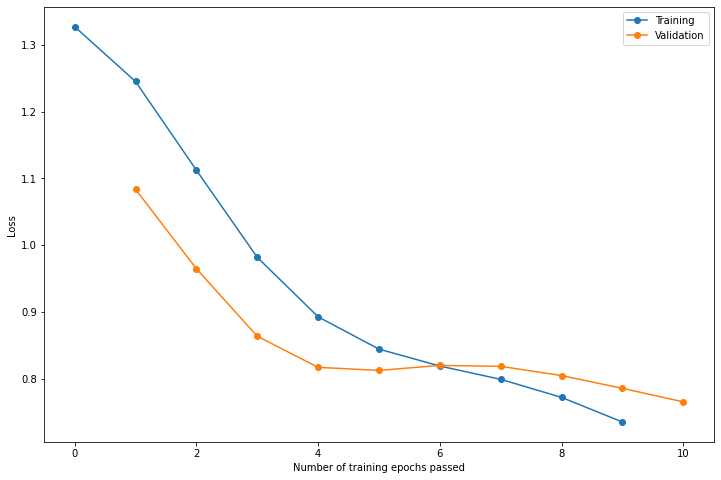

In [27]:
optimizer.plot_errors()

In [34]:
g = np.sign(optimizer.predict(X_val))

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix 
Acc = accuracy_score(y_val,g)
Cm = confusion_matrix(y_val,g)
print("Acurácia:", Acc)
print("Matriz de confusão:")
print(Cm)

Acurácia: 0.7538461538461538
Matriz de confusão:
[[ 27  54]
 [ 10 169]]


(?, 43) -> [... 3 layers ...] -> (?, 1)